# Quantile Regression

Quantile Regression is estimating either the condintional median or other quantiles of the response variable. This regression is used for when outliers, high skeweness and heteroscedasticity exist in the data. However, quantile regression predicts a quantile (or percentile) for a given indpedent variables.


    1. Quite beneficial when heteroscedasticity is present in the data.
    2. Robust to outliers
    3. Distribution of dependent variable can be described via various quantiles.
    5. It is more useful than linear regression when the data is skewed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [21]:
X = dataset['Open']
Y = dataset['Adj Close']

In [4]:
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf

In [22]:
quant = QuantReg(X, Y)

In [6]:
for q in np.linspace(0.05, 0.95, 10):
    print(q)
    print(quant.fit(q=q).summary())
    print()
    print()

0.05
                         QuantReg Regression Results                          
Dep. Variable:                   Open   Pseudo R-squared:               0.9125
Model:                       QuantReg   Bandwidth:                      0.1199
Method:                 Least Squares   Sparsity:                        1.224
Date:                Tue, 16 Oct 2018   No. Observations:                 1172
Time:                        16:14:01   Df Residuals:                     1171
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Adj Close      0.9521      0.001   1012.933      0.000       0.950       0.954


0.15
                         QuantReg Regression Results                          
Dep. Variable:                   Open   Pseudo R-squared:               0.9387
Model:                       QuantReg   

In [11]:
mod = smf.quantreg('Close ~ Open + High + Low', dataset)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  Close   Pseudo R-squared:               0.9846
Model:                       QuantReg   Bandwidth:                     0.02332
Method:                 Least Squares   Sparsity:                       0.1217
Date:                Tue, 16 Oct 2018   No. Observations:                 1172
Time:                        16:14:44   Df Residuals:                     1168
                                        Df Model:                            3
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0061      0.003     -1.950      0.051      -0.012     3.8e-05
Open          -0.6172      0.013    -47.655      0.000      -0.643      -0.592
High           0.8462      0.012     72.067      0.000       0.823       0.869
Low            0.7706      0.012     62.130      0.000       0.746       0.795
==============================================================================
"""

In [28]:
X = np.array(dataset['Open'], dtype=np.float64)
Y = np.array(dataset['Adj Close'], dtype=np.float64)

In [29]:
res = QuantReg(Y, X).fit(0.5, bandwidth='chamberlain')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.9646
Model:                       QuantReg   Bandwidth:                     0.01715
Method:                 Least Squares   Sparsity:                       0.2686
Date:                Tue, 16 Oct 2018   No. Observations:                 1172
Time:                        16:42:46   Df Residuals:                     1171
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.000   2177.970      0.000       0.999       1.001
==============================================================================
"""

In [56]:
print("estimated coefficients: ", res.params) 

estimated coefficients:  [0.99999905]


In [57]:
predictions = res.predict(Y)
predictions

array([ 3.94999625,  3.99999621,  4.12999608, ..., 22.28997986,
       23.97997725, 25.25997604])

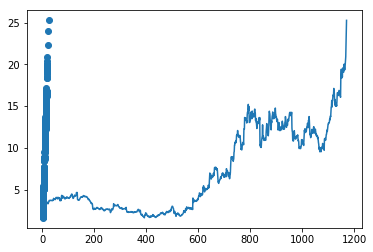

In [58]:
plt.scatter(X,Y)
plt.plot(predictions)

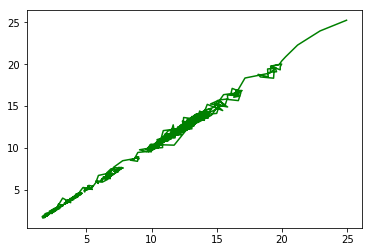

In [59]:
plt.plot(X, predictions, color='g')

In [66]:
mod = smf.quantreg('Close ~ Open', dataset)
res = mod.fit(q=.5)
res.summary()

quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['Open']] + \
            res.conf_int().loc['Open'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('Close ~ Open', dataset).fit()
ols_ci = ols.conf_int().loc['Open'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['Open'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q         a         b        lb        ub
0  0.05  0.001422  0.956459  0.953780  0.959138
1  0.15  0.002624  0.973185  0.971156  0.975214
2  0.25 -0.001128  0.983687  0.981911  0.985463
3  0.35 -0.000974  0.991150  0.989577  0.992724
4  0.45 -0.005219  0.997903  0.996358  0.999449
5  0.55  0.001193  1.002294  1.000702  1.003885
6  0.65 -0.002310  1.008613  1.007020  1.010207
7  0.75  0.004935  1.013916  1.012101  1.015731
8  0.85 -0.002257  1.025515  1.023353  1.027678
9  0.95  0.017680  1.045930  1.041683  1.050177
{'a': 4.270073805337504e-05, 'b': 1.0002530247743395, 'lb': 0.9974880736735984, 'ub': 1.0030179758750808}


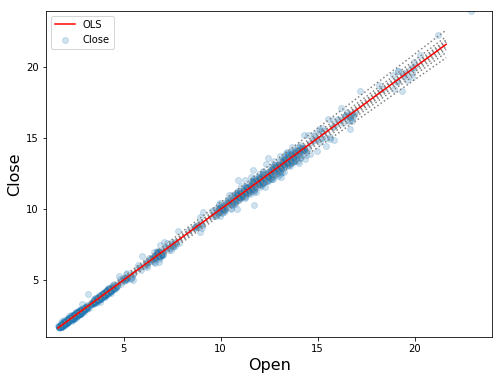

In [77]:
x = np.arange(dataset.Open.min(), dataset.Open.max(), 20)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(dataset.Open, dataset.Close, alpha=.2)
ax.set_xlim((1, 24))
ax.set_ylim((1, 24))
legend = ax.legend()
ax.set_xlabel('Open', fontsize=16)
ax.set_ylabel('Close', fontsize=16);

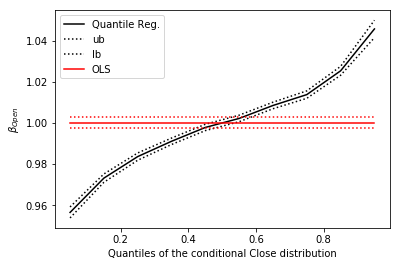

In [78]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{Open}$')
plt.xlabel('Quantiles of the conditional Close distribution')
plt.legend()
plt.show()